In [352]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)
# pd.set_option('display.max_rows', 100)

In [353]:
df = pd.read_csv('movie_dataset.csv')

In [354]:
print('rows and columns',df.shape)
df.head(3)

rows and columns (4803, 24)


,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.44,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.20,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.08,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.90,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.38,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.00,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.30,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


The movie dataset was downloaded form kaggle: https://www.kaggle.com/datasets/utkarshx27/movies-dataset. It is a comprehensive collection of information about 4803 movies. The dataset includes 24 columns which provides a wide range of details about each movie.

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

As we can see, release_Date is represented as object, in order to utilise it later, lets convert it to datetime

In [356]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 4803 non-null   int64         
 1   budget                4803 non-null   int64         
 2   genres                4775 non-null   object        
 3   homepage              1712 non-null   object        
 4   id                    4803 non-null   int64         
 5   keywords              4391 non-null   object        
 6   original_language     4803 non-null   object        
 7   original_title        4803 non-null   object        
 8   overview              4800 non-null   object        
 9   popularity            4803 non-null   float64       
 10  production_companies  4803 non-null   object        
 11  production_countries  4803 non-null   object        
 12  release_date          4802 non-null   datetime64[ns]
 13  revenue           

In [357]:
df.columns.tolist()

['index',
 'budget',
 'genres',
 'homepage',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count',
 'cast',
 'crew',
 'director']

In [358]:
df.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

There are some missing values, like homepage, tagline, director. For every row its crutial to have such values as runtime, genres, buget, revenue and director since the later on analysis are based on these features, so we will remove such data entries. There are also uninformative columns like index, id so we are going to discard them. Also, we consider movie data valid only if there are at least 100 votes

In [359]:
df = df.dropna(subset=['runtime', 'genres', 'budget', 'revenue', 'director'])
df = df[(df['budget'] > 10000) & (df['revenue'] > 0) & (df['vote_count'] > 100) & (df['vote_average'] > 0)]
df = df.drop(columns=['index', 'id'])
df.shape


(2701, 22)

In [360]:
# calculate profit and ROI
df['profit'] = df['revenue'] - df['budget']
df['return_of_investment'] = df['profit'] / df['budget']
 

In [361]:
df.sort_values(by='return_of_investment', ascending=False).head(10)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,profit,return_of_investment
4577,15000,Horror Mystery,http://www.paranormalactivity-movie.com/,haunting psychic entity demonic possession fou...,en,Paranormal Activity,"After a young, middle class couple moves into ...",47.46,"[{""name"": ""Blumhouse Productions"", ""id"": 3172}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-09-14,193355800,86.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What Happens When You Sleep?,Paranormal Activity,5.90,1316,Katie Featherston Micah Sloat Mark Fredrichs A...,"[{'name': 'Jason Blum', 'gender': 2, 'departme...",Oren Peli,193340800,12889.39
4496,60000,Horror Mystery,http://www.blairwitch.com/,witch voodoo legend sorcery maryland,en,The Blair Witch Project,In October of 1994 three student filmmakers di...,41.69,"[{""name"": ""Artisan Entertainment"", ""id"": 2188}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1999-07-14,248000000,81.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The scariest movie of all time is a true story.,The Blair Witch Project,6.30,1055,Michael C. Williams Heather Donahue Joshua Leo...,"[{'name': 'Daniel Myrick', 'gender': 2, 'depar...",Daniel Myrick,247940000,4132.33
4788,12000,Horror Comedy Crime,NaN,gay trailer park pop culture drug dealer heroin,en,Pink Flamingos,Notorious Baltimore criminal and underground f...,4.55,"[{""name"": ""Dreamland Productions"", ""id"": 407}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1972-03-12,6000000,93.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,An exercise in poor taste.,Pink Flamingos,6.20,110,Divine David Lochary Mary Vivian Pearce Mink S...,"[{'name': 'John Waters', 'gender': 2, 'departm...",John Waters,5988000,499.00
4742,65000,Documentary Comedy Drama,NaN,experiment health junk food food industry fast...,en,Super Size Me,Morgan Spurlock subjects himself to a diet bas...,10.40,"[{""name"": ""Kathbur Pictures"", ""id"": 8735}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-01-17,28575078,100.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The first ever reality-based movie ... everyth...,Super Size Me,6.60,506,Morgan Spurlock Daryl Isaacs Lisa Ganjhu Steph...,"[{'name': 'Morgan Spurlock', 'gender': 2, 'dep...",Morgan Spurlock,28510078,438.62
4723,100000,Horror Thriller,http://thegallowsmovie.com/,gallows high school tragedy hanging found footage,en,The Gallows,20 years after a horrific accident during a sm...,18.05,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-07-10,42664410,87.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Every School Has Its Spirit,The Gallows,4.90,361,Cassidy Gifford Ryan Shoos Pfeifer Brown Reese...,"[{'name': 'Jason Blum', 'gender': 2, 'departme...",Travis Cluff,42564410,425.64
4514,130000,Drama Thriller,NaN,diving cataclysm nightmare panic red sea,en,Open Water,Two divers are left out at sea without a boat....,15.61,"[{""name"": ""Plunge Pictures LLC"", ""id"": 22376}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-08-06,54667954,79.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Scream all you want.,Open Water,5.40,315,Blanchard Ryan Daniel Travis Saul Stein Michae...,"[{'name': 'Chris Kentis', 'gender': 2, 'depart...",Chris Kentis,54537954,419.52
3159,85000,Horror,NaN,gas station texas van gore midnight movie,en,The Texas Chain Saw Massacre,Five friends visiting their grandfather's hous...,29.26,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1974-10-01,30859000,83.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Who will survive

In [362]:
pd.set_option('display.float_format', '{:.2f}'.format)
df[['budget','revenue','popularity','runtime','vote_average']].describe()

,budget,revenue,popularity,runtime,vote_average
count,2701.00,2701.00,2701.00,2701.00,2701.00
mean,45817669.27,142503909.14,33.82,111.18,6.38
std,46318297.04,196671335.97,37.71,20.19,0.83
min,12000.00,12.00,1.55,63.00,3.00
25%,14500000.00,30050028.00,15.00,97.00,5.80
50%,30000000.00,75993061.00,24.96,107.00,6.40
75%,60000000.00,170268750.00,41.52,122.00,7.00
max,380000000.00,2787965087.00,875.58,248.00,8.50


In [363]:
col = 'budget'
s = df[col].std()
zscores = (df[col] - df[col].mean()) / s

df[zscores > 3].head(5)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,profit,return_of_investment
0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.44,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.20,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,2550965087,10.76
1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.08,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.90,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,661000000,2.20
2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.38,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.00,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.30,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,635674609,2.59
3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.31,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.60,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,834939099,3.34
4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.93,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.10,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,24139100,0.09


In [364]:
df[zscores < -3]


,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,profit,return_of_investment


<Axes: xlabel='release_date'>

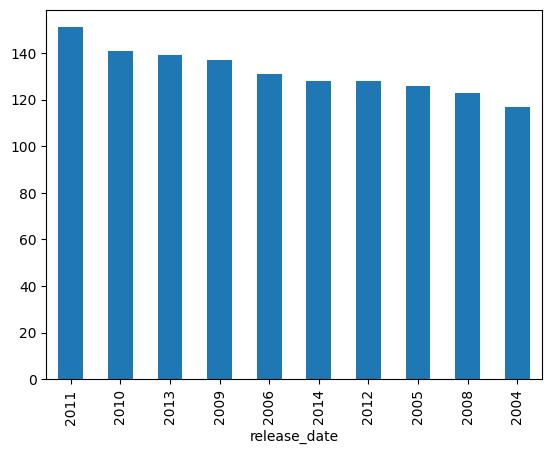

In [365]:
df['release_date'].dt.year.value_counts().head(10).plot(kind='bar')

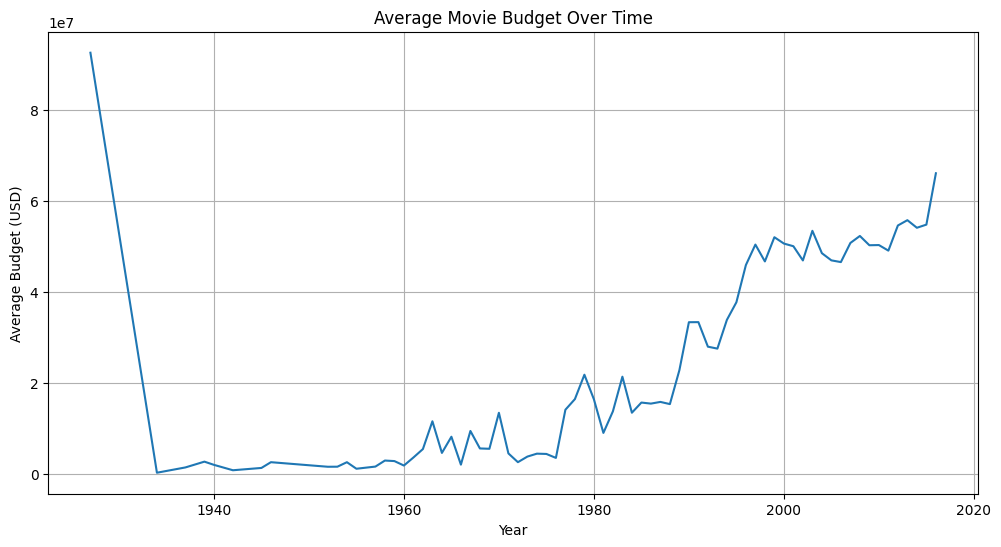

In [366]:
df['release_year'] = df['release_date'].dt.year

avg_budget_by_year = df.groupby('release_year')['budget'].mean()

plt.figure(figsize=(12, 6))
avg_budget_by_year.plot()
plt.title("Average Movie Budget Over Time")
plt.xlabel("Year")
plt.ylabel("Average Budget (USD)")
plt.grid(True)
plt.show()

In [367]:
movies_1927 = df[df['release_date'].dt.year == 1927]
# print(movies_1927)
movies_1927

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,profit,return_of_investment,release_year
2638,92620000,Drama Science Fiction,NaN,man vs machine underground world inventor metr...,de,Metropolis,In a futuristic city sharply divided between t...,32.35,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}]",1927-01-10,650422,153.00,"[{""iso_639_1"": ""xx"", ""name"": ""No Language""}]",Released,There can be no understanding between the hand...,Metropolis,8.00,657,Brigitte Helm Alfred Abel Gustav Fr\u00f6hlich...,"[{'name': 'Erich Pommer', 'gender': 2, 'depart...",Fritz Lang,-91969578,-0.99,1927


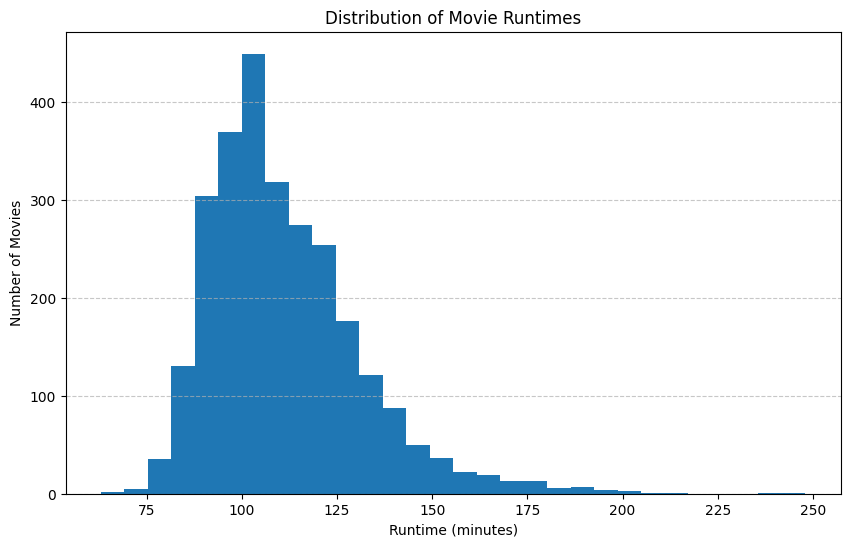

In [368]:
df['runtime'].plot(kind='hist', bins=30, figsize=(10,6))

plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Runtimes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

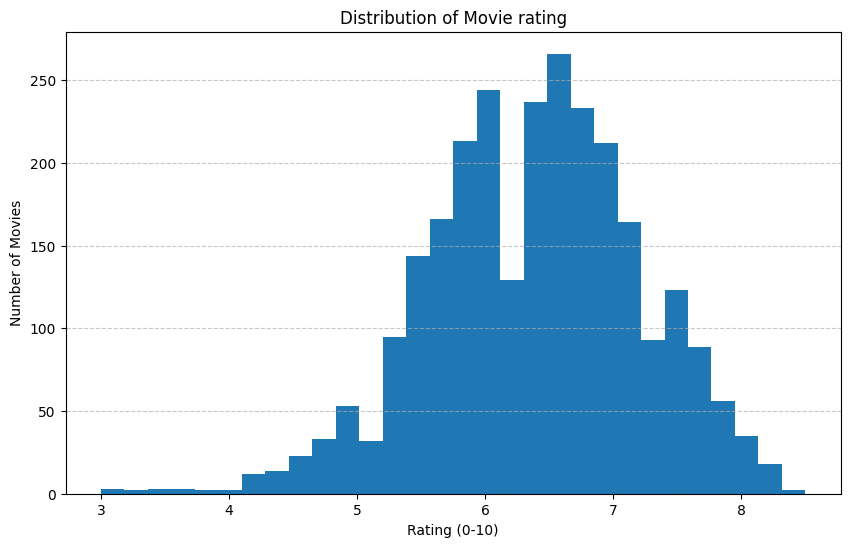

In [369]:
df['vote_average'].plot(kind='hist', bins=30, figsize=(10,6))

plt.xlabel('Rating (0-10)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Axes: ylabel='count'>

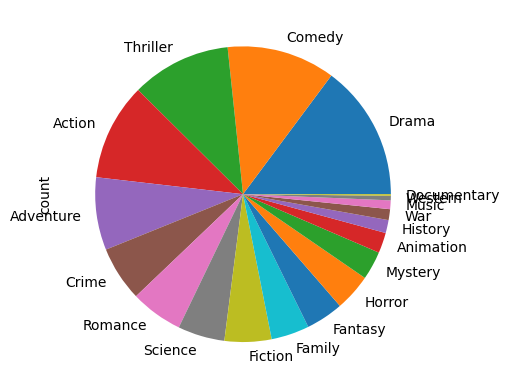

In [370]:
all_genres = df['genres'].str.split(' ').explode()
genre_counts = all_genres.value_counts()
genre_counts.plot(kind='pie')

The year with the most 'Drama' movies was 2010 with 65 movies.


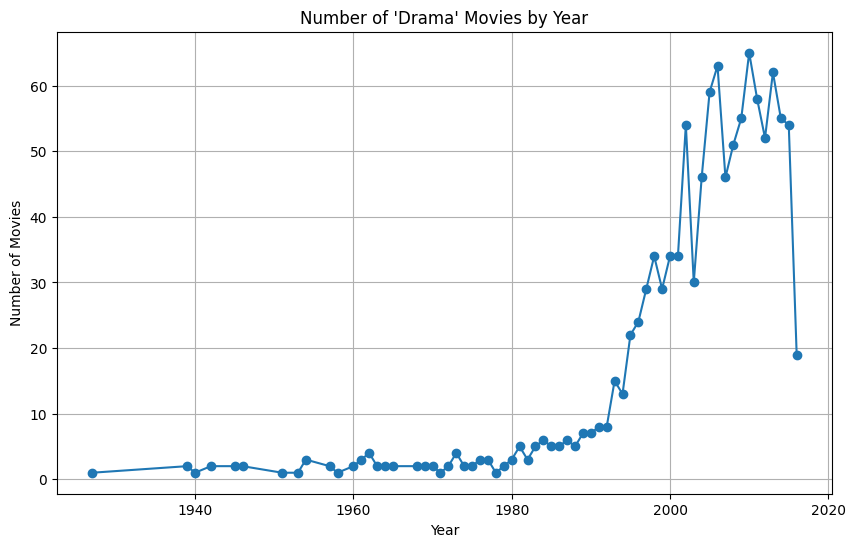

In [371]:
most_common_genre = genre_counts.idxmax()

mask = df['genres'].str.contains(most_common_genre)
genre_df = df[mask].copy()

genre_df['year'] = genre_df['release_date'].dt.year

year_counts = genre_df['year'].value_counts().sort_index()

best_year = year_counts.idxmax()
count_in_best_year = year_counts.max()
print(f"The year with the most '{most_common_genre}' movies was {best_year} with {count_in_best_year} movies.")

plt.figure(figsize=(10,6))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.title(f"Number of '{most_common_genre}' Movies by Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()

Profit stats per genre:
                    mean
genres                  
Animation   219450961.08
Adventure   185781469.31
Family      179398665.60
Fantasy     176200469.00
Fiction     138040579.88
Science     138040579.88
Action      130049622.86
Comedy       88709818.12
Romance      82878510.35
War          82748462.40
Music        80811495.92
Thriller     77888309.57
Mystery      71315167.19
Drama        66215482.73
Crime        60408606.30
History      54553224.06
Documentary  50757128.85
Horror       50261469.05
Western      45972368.63


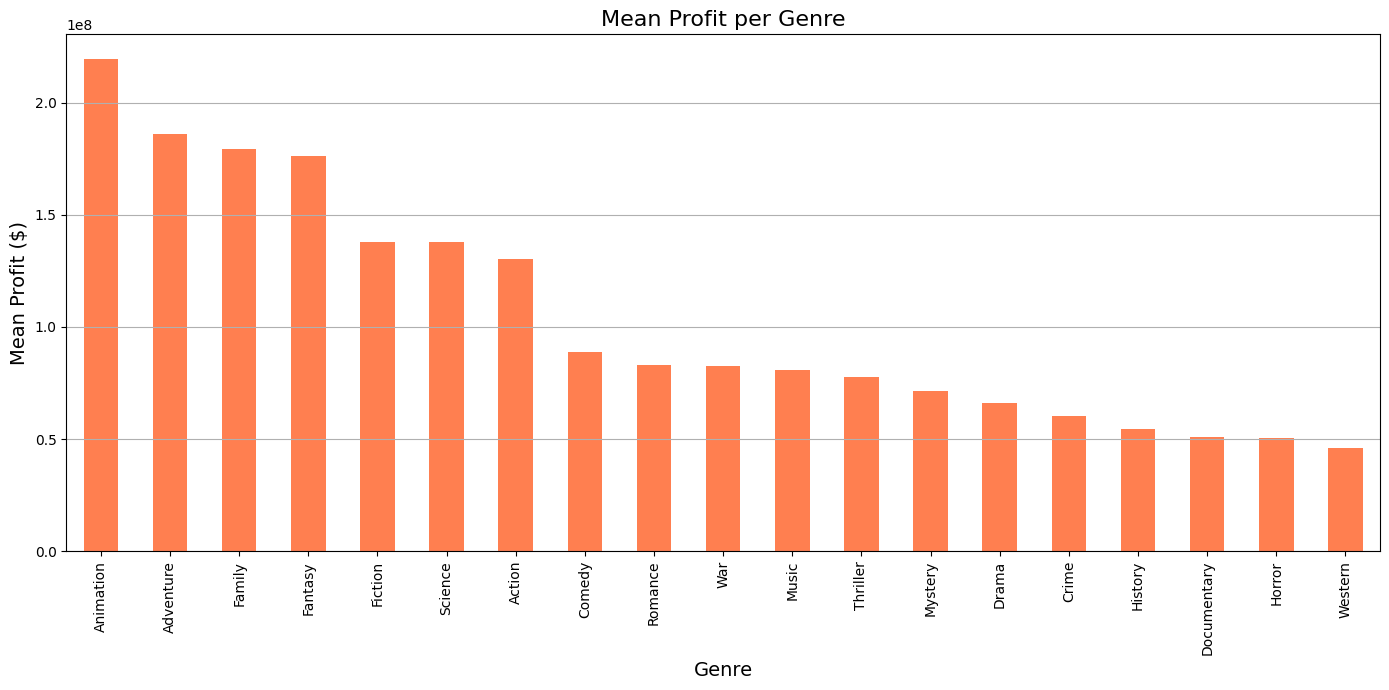

In [372]:



df_expanded = df.copy()
df_expanded['genres'] = df_expanded['genres'].str.split(' ')
df_expanded = df_expanded.explode('genres')

profit_stats = df_expanded.groupby('genres')['profit'].agg([ 'mean']).sort_values('mean', ascending=False)

print("Profit stats per genre:")
print(profit_stats)

plt.figure(figsize=(14, 7))
profit_stats['mean'].sort_values(ascending=False).plot(kind='bar', color='coral')
plt.title('Mean Profit per Genre', fontsize=16)
plt.ylabel('Mean Profit ($)', fontsize=14)
plt.xlabel('Genre', fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Profit stats per genre:
                   mean
genres                 
Animation   85862109.80
Adventure   81642287.38
Fantasy     79140751.04
Family      73909116.54
Action      67742459.42
Fiction     67461649.00
Science     67461649.00
Western     47775633.87
War         46653568.68
History     44889905.96
Thriller    43432144.33
Mystery     40958630.33
Comedy      40843771.53
Crime       37736607.24
Drama       34546823.39
Romance     32476206.98
Music       29774531.51
Horror      21437558.65
Documentary  7697307.69


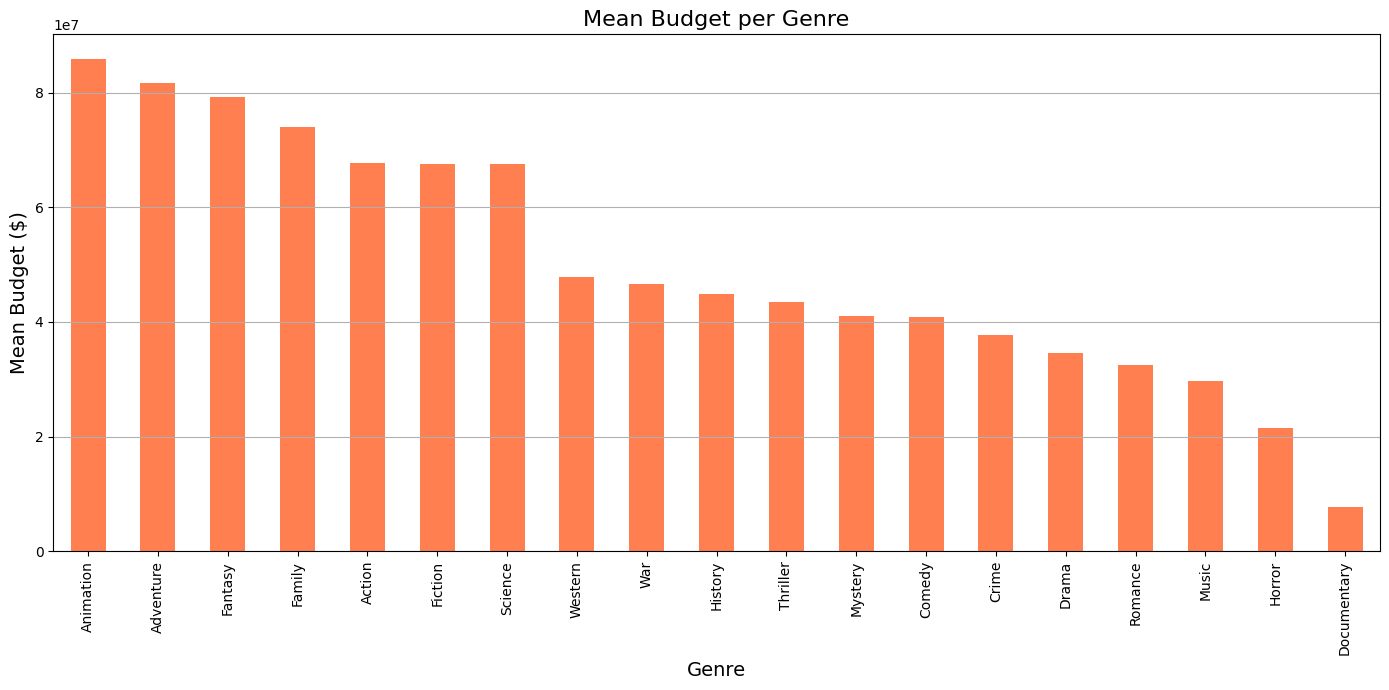

In [373]:
budget_stats = df_expanded.groupby('genres')['budget'].agg([ 'mean']).sort_values('mean', ascending=False)

print("Profit stats per genre:")
print(budget_stats)

plt.figure(figsize=(14, 7))
budget_stats['mean'].sort_values(ascending=False).plot(kind='bar', color='coral')
plt.title('Mean Budget per Genre', fontsize=16)
plt.ylabel('Mean Budget ($)', fontsize=14)
plt.xlabel('Genre', fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

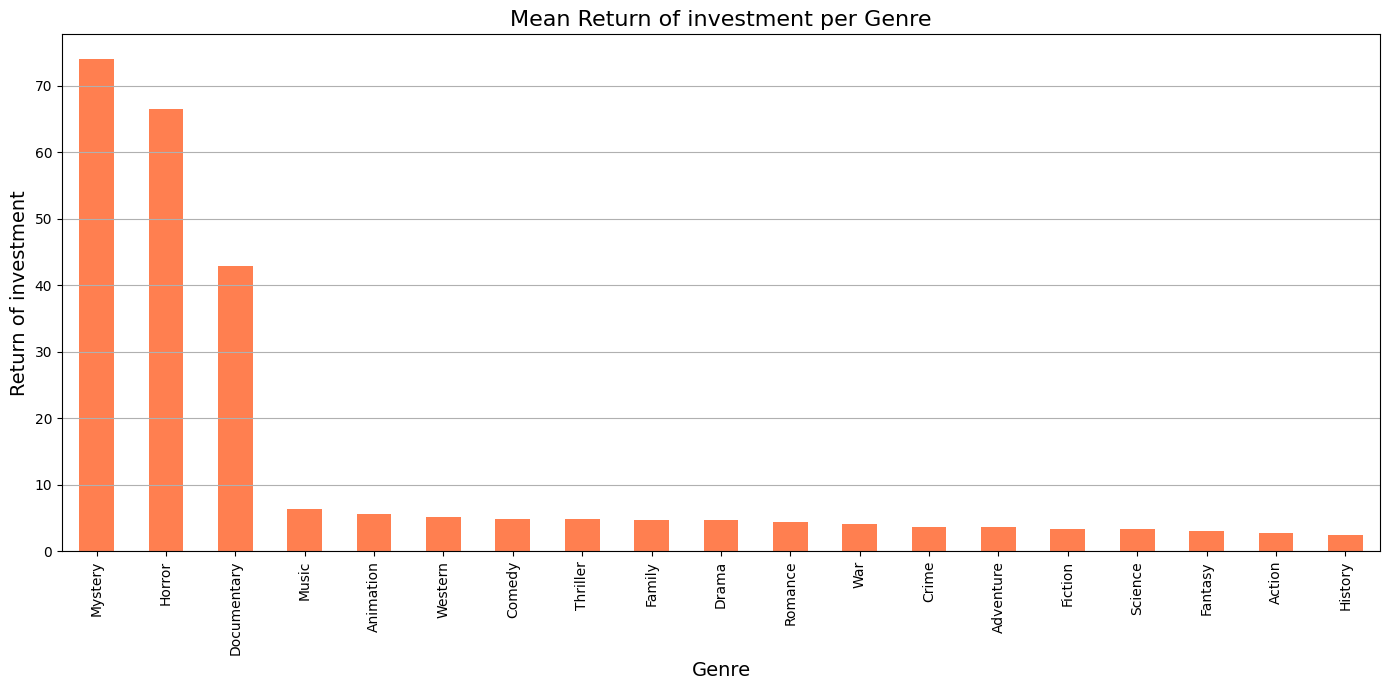

In [374]:
roi_stats = df_expanded.groupby('genres')['return_of_investment'].agg([ 'mean']).sort_values('mean', ascending=False)
plt.figure(figsize=(14, 7))
roi_stats['mean'].sort_values(ascending=False).plot(kind='bar', color='coral')
plt.title('Mean Return of investment per Genre', fontsize=16)
plt.ylabel('Return of investment', fontsize=14)
plt.xlabel('Genre', fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\micku\AppData\Local\Temp\ipykernel_6836\4261832974.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_expanded, x='genres', y='vote_average', palette='Set2')


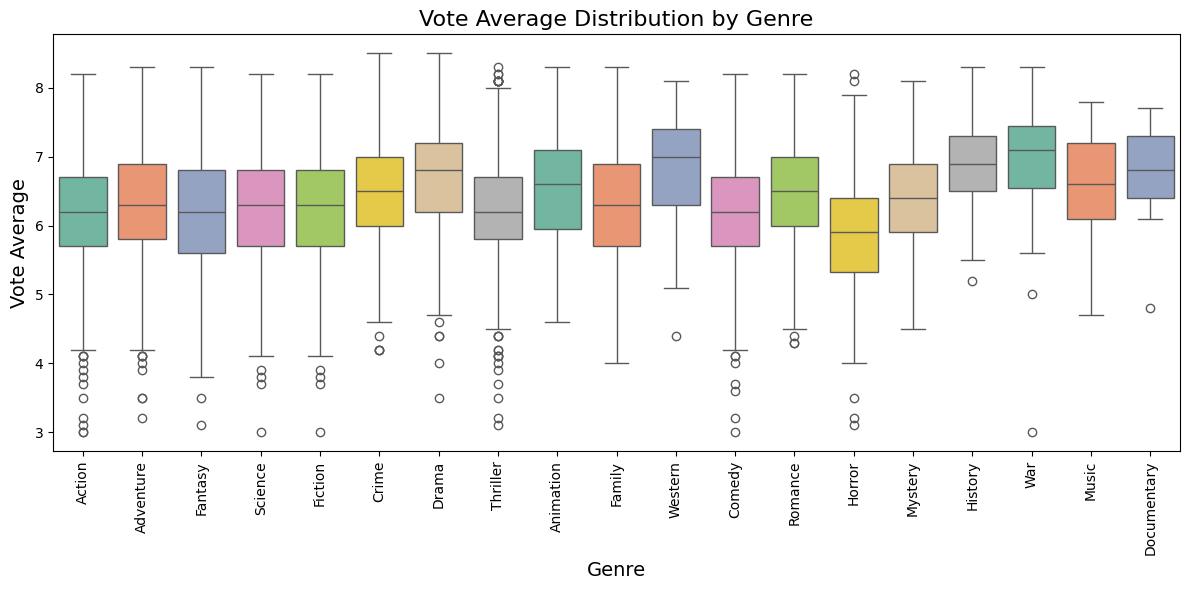

In [375]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_expanded, x='genres', y='vote_average', palette='Set2')
plt.xticks(rotation=90) 
plt.title('Vote Average Distribution by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Vote Average', fontsize=14)
plt.tight_layout()
plt.show()


<Axes: xlabel='budget', ylabel='profit'>

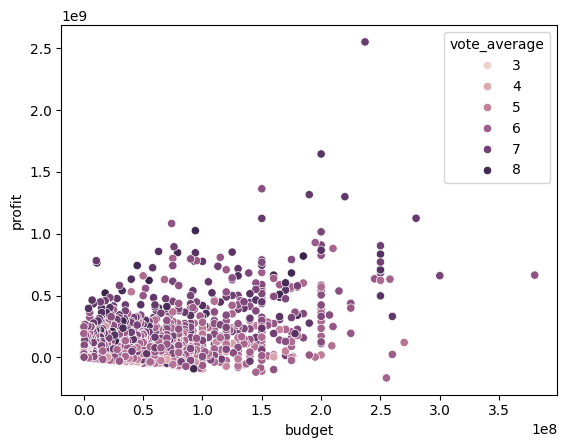

In [376]:
sns.scatterplot( x='budget', y='profit', data=df, hue='vote_average')

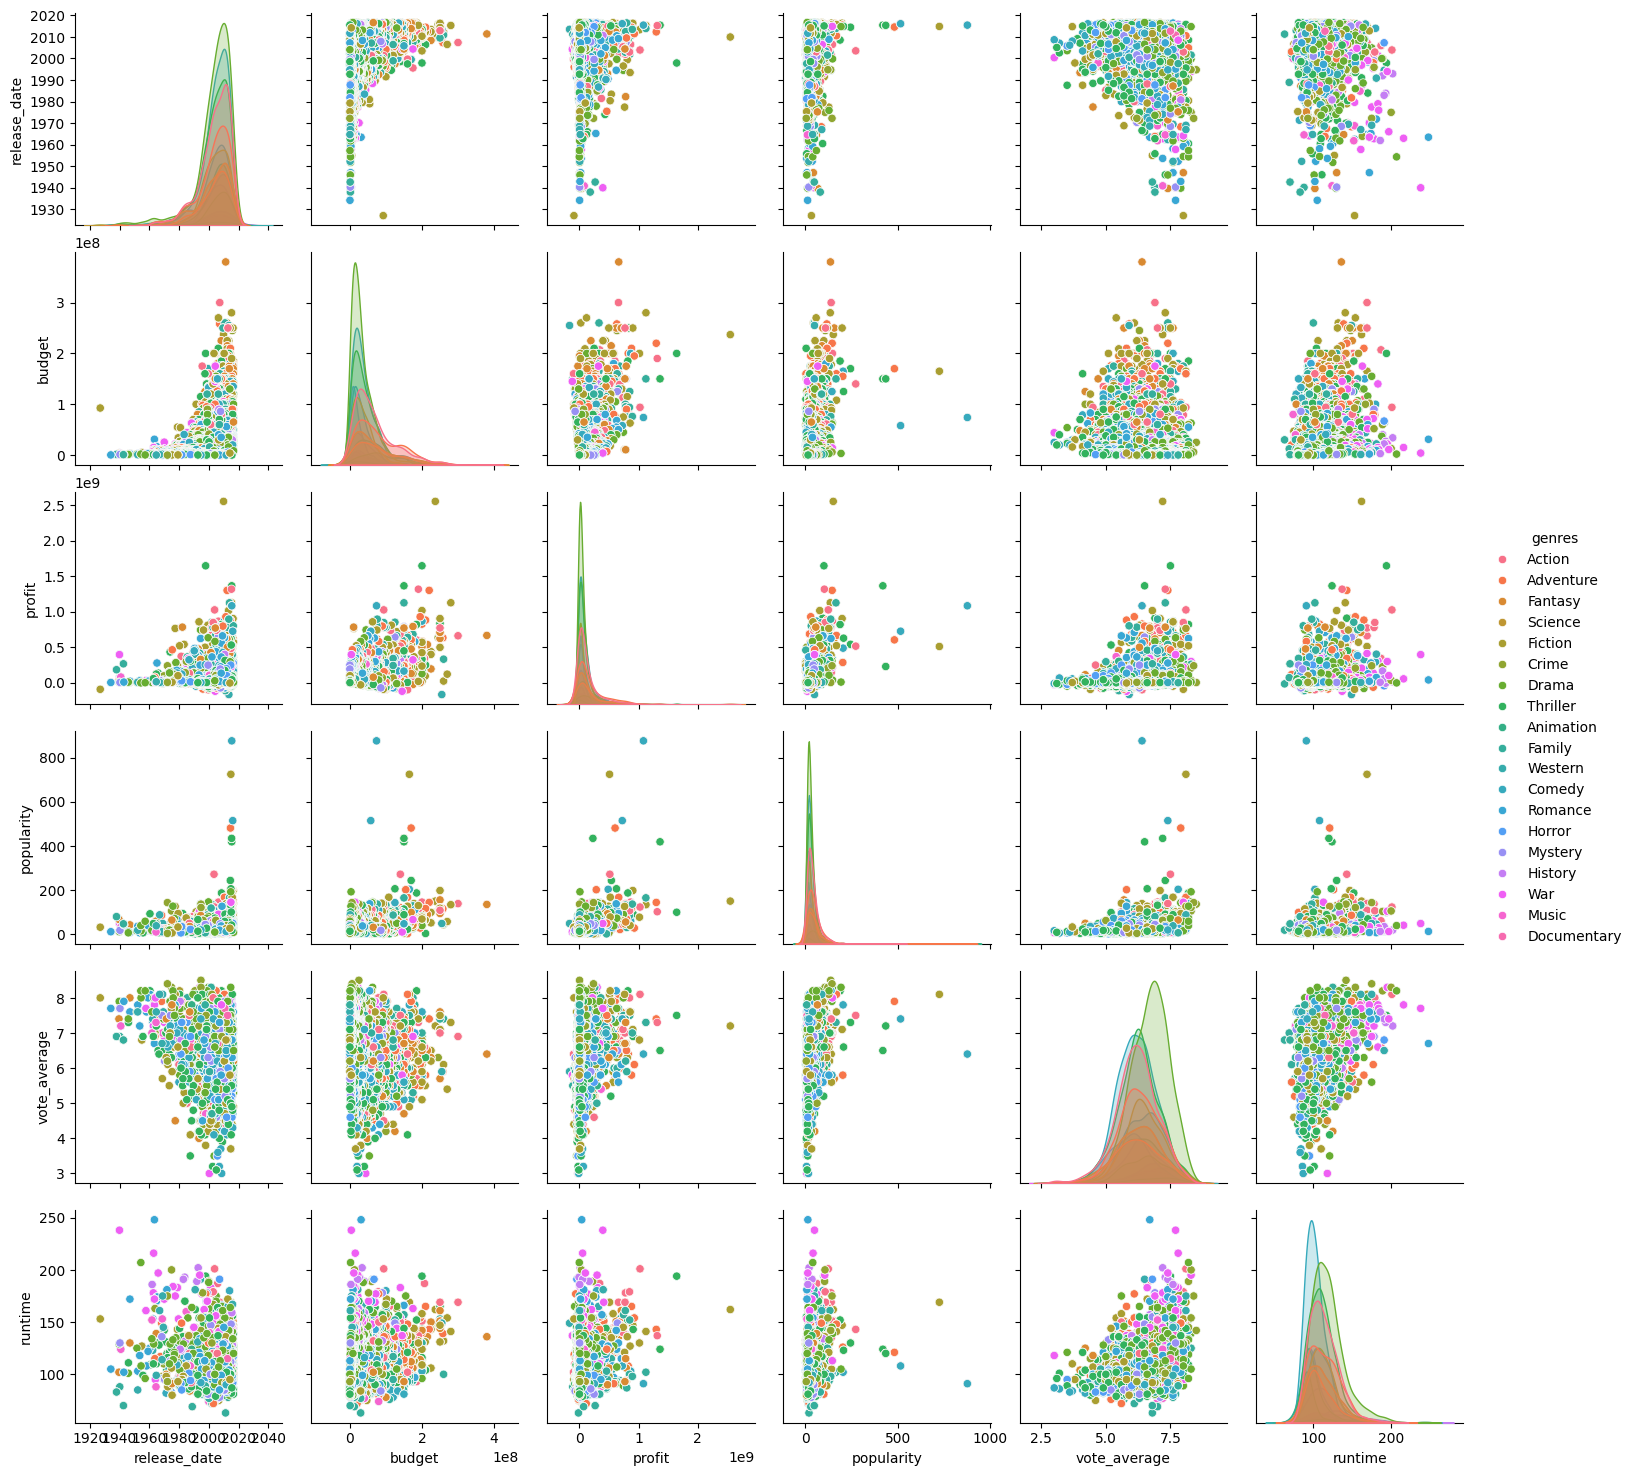

In [377]:
sns.pairplot(df_expanded, vars=['release_date','budget','profit','popularity','vote_average', 'runtime'], hue='genres')

In [378]:
df_corr = df[['release_date', 'revenue', 'budget','profit','popularity','vote_average', 'vote_count', 'runtime']].corr()
df_corr

,release_date,revenue,budget,profit,popularity,vote_average,vote_count,runtime
release_date,1.00,0.12,0.26,0.07,0.13,-0.25,0.15,-0.16
revenue,0.12,1.00,0.69,0.98,0.57,0.17,0.74,0.26
budget,0.26,0.69,1.00,0.53,0.39,-0.07,0.51,0.25
profit,0.07,0.98,0.53,1.00,0.56,0.22,0.72,0.23
popularity,0.13,0.57,0.39,0.56,1.00,0.28,0.73,0.20
vote_average,-0.25,0.17,-0.07,0.22,0.28,1.00,0.39,0.41
vote_count,0.15,0.74,0.51,0.72,0.73,0.39,1.00,0.29
runtime,-0.16,0.26,0.25,0.23,0.20,0.41,0.29,1.00


<Axes: >

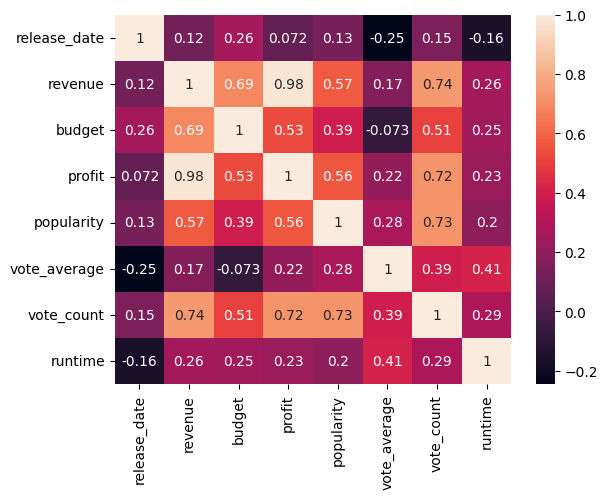

In [379]:
sns.heatmap(df_corr, annot = True)

C:\Users\micku\AppData\Local\Temp\ipykernel_6836\112540915.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('runtime_bin')['vote_average'].mean().dropna()


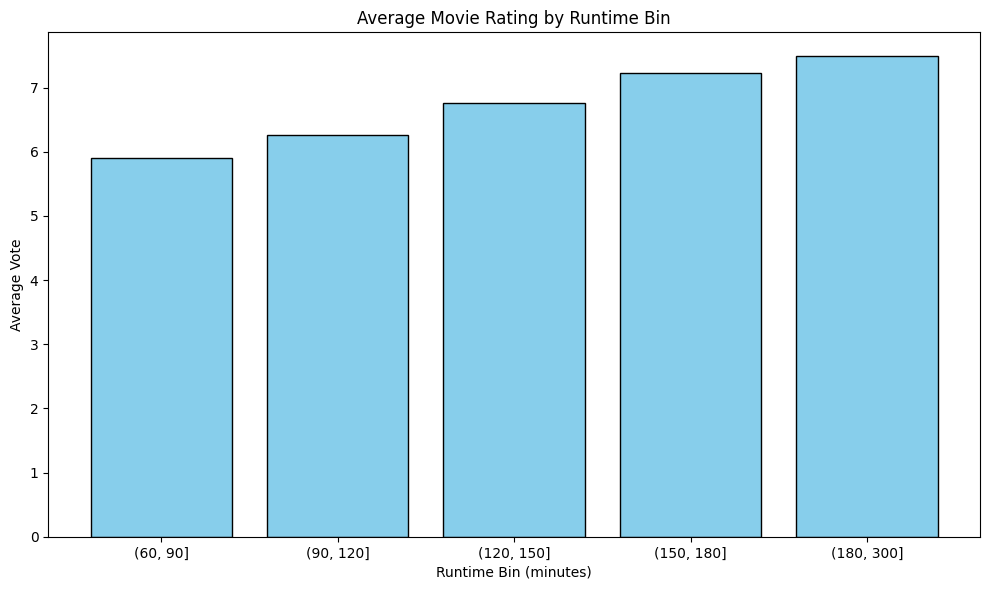

In [ ]:
df['runtime_bin'] = pd.cut(df['runtime'], bins=[0, 60, 90, 120, 150, 180, 300])
grouped = df.groupby('runtime_bin')['vote_average'].mean().dropna()

labels = [str(interval) for interval in grouped.index]
values = grouped.values

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='skyblue', edgecolor='black')
plt.xlabel('Runtime Bin (minutes)')
plt.ylabel('Average Vote')
plt.title('Average Movie Rating by Runtime')
plt.tight_layout()
plt.show()
